In [2]:
#%% DATA ANALYSIS FOR ONE-P PHOTOSTIM EXPERIMENTS
import sys
sys.path.append('/home/pshah/Documents/code/PackerLab_pycharm/')

import utils.funcs_pj as pjf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import alloptical_utils_pj as aoutils
import alloptical_plotting_utils as aoplot


In [2]:
# create onePstim superobject that will collect analyses from various individual experiments

results_object_path = '/home/pshah/mnt/qnap/Analysis/onePstim_results_superobject.pkl'
if os.path.exists(results_object_path):
    onePresults = aoutils.import_resultsobj(pkl_path=results_object_path)
else:
    aoutils.OnePhotonResults(save_path=results_object_path)



importing resultsobj from: /home/pshah/mnt/qnap/Analysis/onePstim_results_superobject.pkl


DONE IMPORT of <class 'alloptical_utils_pj.OnePhotonResults'> resultsobj


In [3]:
onePresults.mean_stim_responses

,pkl_list,pre-4ap response,post-4ap response (outside sz),post-4ap response (during sz),Prep,Trial,Decay constant pre-4ap (secs.),Decay constant post-4ap outside sz (secs.),Decay constant post-4ap during sz (secs.)
0,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS17/...,0.1686,-,-,PS17,t-008,0.328371,NaN,NaN
1,/home/pshah/mnt/qnap/Analysis/2021-01-19/2021-...,0.3574,-,-,PS07,t-003,0.459718,NaN,NaN
2,/home/pshah/mnt/qnap/Analysis/2021-01-19//2021...,0.3032,-,-,PS07,t-010,0.465946,NaN,NaN
4,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.418,-,-,PS11,t-004,0.459799,NaN,NaN
5,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.3856,-,-,PS11,t-009,0.525532,NaN,NaN
6,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS18/...,0.3594,-,-,PS18,t-007,0.459749,NaN,NaN
7,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS09/...,0.2662,-,-,PS09,t-008,0.525459,NaN,NaN
8,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.1217,-,-,PS16,t-005,0.459640,NaN,NaN
9,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.093,-,-,PS16,t-006,0.393989,NaN,NaN
10,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.087,-,-,PS16,t-008,0.465946,NaN,NaN


## PRE 4ap TRIALS 

In [3]:
###### IMPORT pkl file containing data in form of expobj
trial = 't-008'
date = '2021-02-02'
prep = 'PS17'
# pkl_path='/home/pshah/mnt/qnap/Analysis/%s/%s_%s/%s_%s.pkl' % (date, date, trial, date, trial)
pkl_path='/home/pshah/mnt/qnap/Analysis/%s/%s/%s_%s/%s_%s.pkl' % (date, prep, date, trial, date, trial)


expobj, experiment = aoutils.import_expobj(trial=trial, date=date, pkl_path=pkl_path)



importing expobj for "2021-02-02, t-008" from: /home/pshah/mnt/qnap/Analysis/2021-02-02/PS17/2021-02-02_t-008/2021-02-02_t-008.pkl


DONE IMPORT of PS17: t-008, 1p photostim, pre 4ap, 2x 20x 1p stim


In [5]:
if expobj.pkl_path not in list(onePresults.mean_stim_responses['pkl_list']):
    onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses.shape[0]+1] = [expobj.pkl_path] + ['-'] * (onePresults.mean_stim_responses.shape[1] - 1)
    onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == expobj.pkl_path, 'Prep'] = expobj.metainfo['animal prep.']
    onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == expobj.pkl_path, 'Trial'] = expobj.metainfo['trial']

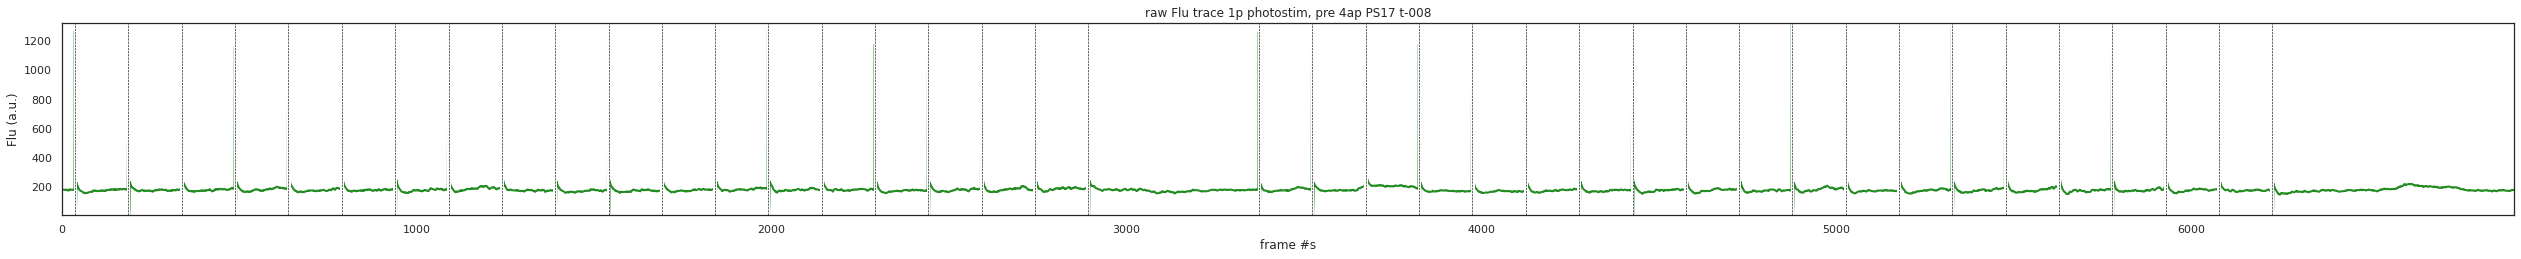

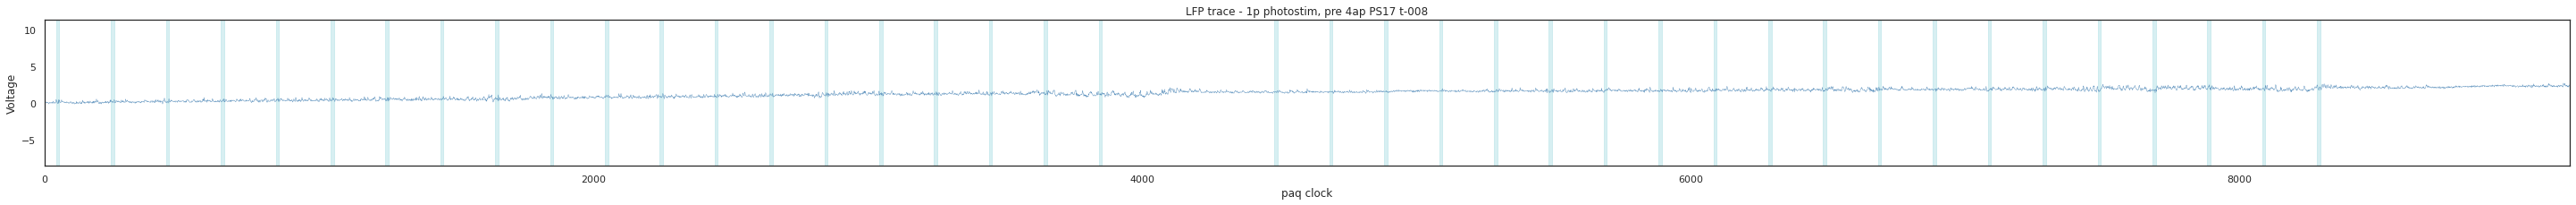

In [4]:
# %% # look at the average Ca Flu trace pre and post stim, just calculate the average of the whole frame and plot as continuous timeseries
# - this approach should also allow to look at the stims that give rise to extended seizure events where the Ca Flu stays up

# # EXCLUDE CERTAIN STIM START FRAMES
# expobj.stim_start_frames = [frame for frame in expobj.stim_start_frames if 4000 > frame or frame > 5000]
# expobj.stim_end_frames = [frame for frame in expobj.stim_end_frames if 4000 > frame or frame > 5000]
# expobj.stim_start_times = [time for time in expobj.stim_start_times if 5.5e6 > time or time > 6.5e6]
# expobj.stim_end_times = [time for time in expobj.stim_end_times if 5.5e6 > time or time > 6.5e6]
# expobj.stim_duration_frames = int(np.mean(
#     [expobj.stim_end_frames[idx] - expobj.stim_start_frames[idx] for idx in range(len(expobj.stim_start_frames))]))

aoplot.plotMeanRawFluTrace(expobj, stim_span_color='white', x_axis='frames')
aoplot.plotLfpSignal(expobj, x_axis='paq')



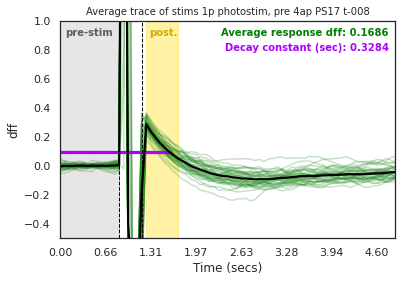

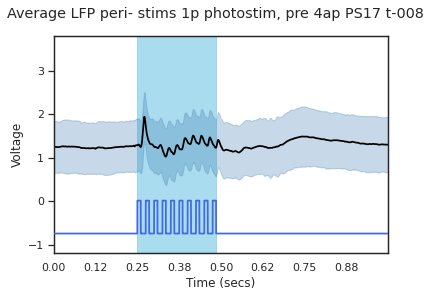

In [5]:
flu_list, mean_response, decay_constant = aoplot.plot_flu_1pstim_avg_trace(expobj, x_axis='time', individual_traces=True, stim_span_color=None, y_axis='dff', quantify=True)
aoplot.plot_lfp_1pstim_avg_trace(expobj, x_axis='time', individual_traces=False, pre_stim=0.25, post_stim=0.75, optoloopback=True)



In [59]:
# # pkl path list of analysed experiments
# # - not sure that I actually really need this.
# if expobj.pkl_path not in onePresults.pre_4ap_pkl:
#     onePresults.pre_4ap_pkl.append(expobj.pkl_path)
#     onePresults.save()
# print(onePresults.pre_4ap_pkl)

In [9]:
print(expobj.pkl_path, '\nmean response to save: ', mean_response)
onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == expobj.pkl_path, 'pre-4ap response'] = mean_response

onePresults.save()

/home/pshah/mnt/qnap/Analysis/2021-02-02/PS18/2021-02-02_t-007/2021-02-02_t-007.pkl 
mean response to save:  0.3594


pkl saved to /home/pshah/mnt/qnap/Analysis/onePstim_results_superobject.pkl



In [10]:
onePresults.mean_stim_responses

,pkl_list,pre-4ap response,post-4ap response (outside sz),post-4ap response (during sz),Prep,Trial
0,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS17/...,0.1686,None,None,PS17,t-008
1,/home/pshah/mnt/qnap/Analysis/2021-01-19/2021-...,0.3574,None,None,PS07,t-003
2,/home/pshah/mnt/qnap/Analysis/2021-01-19//2021...,0.3032,None,None,PS07,t-010
4,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.418,None,None,PS11,t-004
5,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.3856,None,None,PS11,t-009
6,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS18/...,0.3594,None,None,PS18,t-007
7,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS09/...,0.2662,None,None,PS09,t-008
8,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.1217,None,None,PS16,t-005
9,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.093,None,None,PS16,t-006
10,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.087,None,None,PS16,t-008


## POST 4ap TRIALS - stims out of sz

In [39]:
###### IMPORT pkl file containing data in form of expobj
trial = 't-015'
date = '2021-01-24'
prep = 'PS09'
# pkl_path='/home/pshah/mnt/qnap/Analysis/%s/%s_%s/%s_%s.pkl' % (date, date, trial, date, trial)
pkl_path='/home/pshah/mnt/qnap/Analysis/%s/%s/%s_%s/%s_%s.pkl' % (date, prep, date, trial, date, trial)


expobj, experiment = aoutils.import_expobj(trial=trial, date=date, pkl_path=pkl_path)


importing expobj for "2021-01-24, t-015" from: /home/pshah/mnt/qnap/Analysis/2021-01-24/PS09/2021-01-24_t-015/2021-01-24_t-015.pkl


DONE IMPORT of PS09: t-015, 1p photostim, post 4ap, 1 seziure, seems to be spurred on by 1p stim; 20x 1p stim; sequential 1p stims are able to induce spreading activity


In [40]:
if expobj.pkl_path not in list(onePresults.mean_stim_responses['pkl_list']):
    onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses.shape[0]+1] = [expobj.pkl_path] + ['-'] * (onePresults.mean_stim_responses.shape[1] - 1)
    onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == expobj.pkl_path, 'Prep'] = expobj.metainfo['animal prep.']
    onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == expobj.pkl_path, 'Trial'] = expobj.metainfo['trial']

In [41]:
onePresults.mean_stim_responses

,pkl_list,pre-4ap response,post-4ap response (outside sz),post-4ap response (during sz),Prep,Trial,Decay constant pre-4ap (secs.),Decay constant post-4ap outside sz (secs.),Decay constant post-4ap during sz (secs.)
0,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS17/...,0.1686,-,-,PS17,t-008,0.328371,NaN,NaN
1,/home/pshah/mnt/qnap/Analysis/2021-01-19/2021-...,0.3574,-,-,PS07,t-003,0.459718,NaN,NaN
2,/home/pshah/mnt/qnap/Analysis/2021-01-19//2021...,0.3032,-,-,PS07,t-010,0.465946,NaN,NaN
4,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.418,-,-,PS11,t-004,0.459799,NaN,NaN
5,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.3856,-,-,PS11,t-009,0.525532,NaN,NaN
6,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS18/...,0.3594,-,-,PS18,t-007,0.459749,NaN,NaN
7,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS09/...,0.2662,-,-,PS09,t-008,0.525459,NaN,NaN
8,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.1217,-,-,PS16,t-005,0.459640,NaN,NaN
9,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.093,-,-,PS16,t-006,0.393989,NaN,NaN
10,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.087,-,-,PS16,t-008,0.465946,NaN,NaN


In [42]:
print(expobj.metainfo)
seizures_lfp_timing_matarray=expobj.pkl_path[:-37] + 'paired_measurements/%s_%s_%s.mat' % (date, expobj.metainfo['animal prep.'], trial[-3:])
# seizures_lfp_timing_matarray=None
print(seizures_lfp_timing_matarray)

{'animal prep.': 'PS09', 'trial': 't-015', 'date': '2021-01-24', 'exptype': '1p photostim, post 4ap', 'data_path_base': '/home/pshah/mnt/qnap/Data/2021-01-24/PS09/', 'comments': '1 seziure, seems to be spurred on by 1p stim; 20x 1p stim; sequential 1p stims are able to induce spreading activity'}
/home/pshah/mnt/qnap/Analysis/2021-01-24/PS09//paired_measurements/2021-01-24_PS09_015.mat


In [43]:
expobj.paq_path

'/home/pshah/mnt/qnap/Data/2021-01-24/PS09/2021-01-24_PS09_015.paq'


collecting information about seizures...
-- using matlab array to collect seizures /home/pshah/mnt/qnap/Analysis/2021-01-24/PS09//paired_measurements/2021-01-24_PS09_015.mat: 

adding seizure frames loaded up from:  /home/pshah/mnt/qnap/Analysis/2021-01-24/PS09//paired_measurements/2021-01-24_PS09_015.mat

Total extra seizure/CSD or other frames to discard:  3456
|- first and last 10 indexes of these frames [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455]
|-now classifying photostims at phases of seizures ... 
 
|- stims_in_sz: [574, 724, 875, 1025, 1175, 1325, 1476, 1626, 1776, 1926, 2077, 2227]  
|- stims_out_sz: [124, 274, 424, 2377, 2527, 2678, 2828, 2978]  
|- stims_bf_sz: [574]  
|- stims_af_sz: [2227]


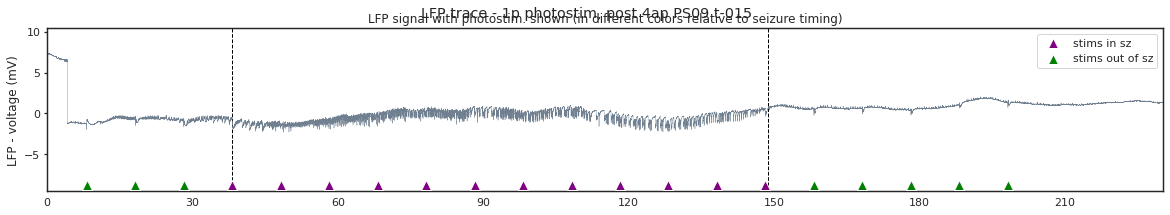



pkl saved to /home/pshah/mnt/qnap/Analysis/2021-01-24/PS09//2021-01-24_t-015/2021-01-24_t-015.pkl



In [44]:
# %% classifying stims as in or out of seizures

expobj.collect_seizures_info(seizures_lfp_timing_matarray=seizures_lfp_timing_matarray, discard_all=True)


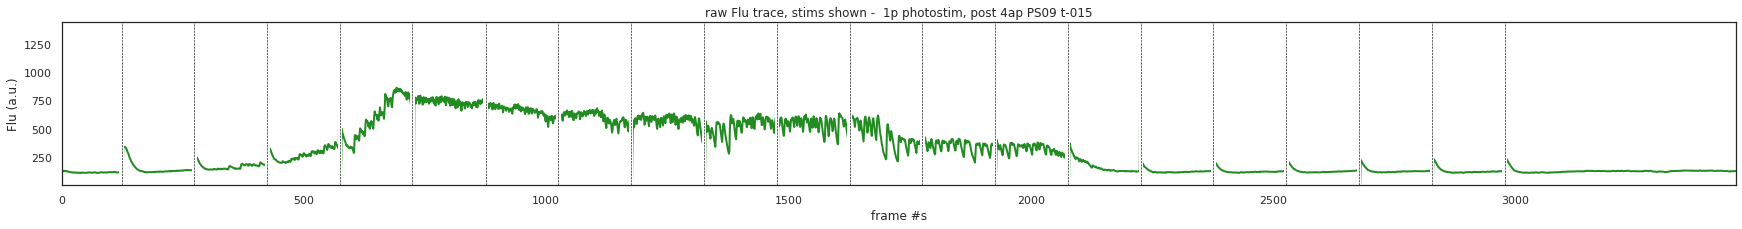

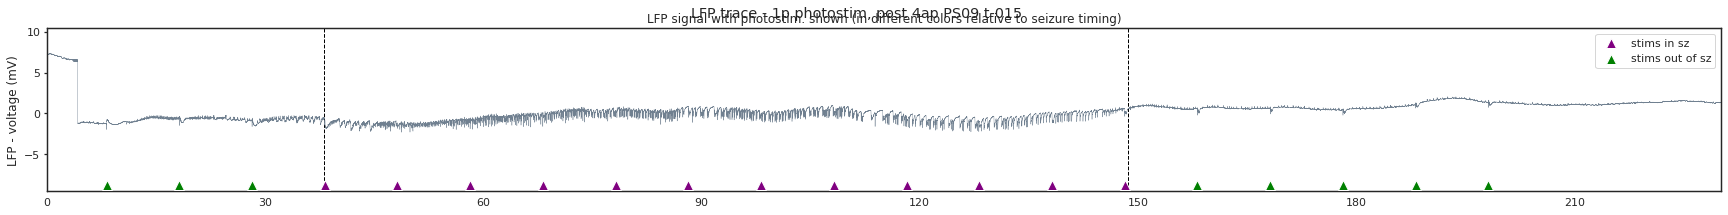

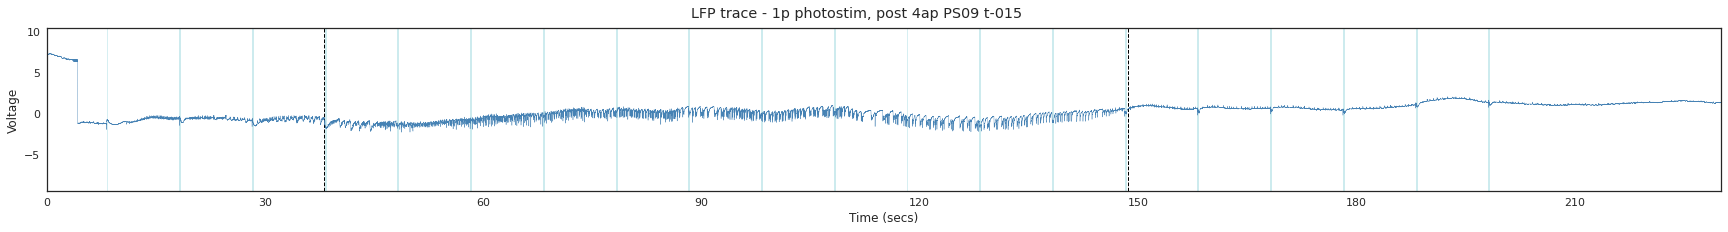

In [45]:
aoplot.plotMeanRawFluTrace(expobj, stim_span_color='white', x_axis='frames', figsize=[30, 3], title='raw Flu trace, stims shown - ')
aoplot.plot_lfp_stims(expobj, x_axis='time', figsize=[30, 3], sz_markings = True)
aoplot.plotLfpSignal(expobj, x_axis='time', figsize=[30, 3], sz_markings = True)


In [46]:
expobj.stims_out_sz

[124, 274, 424, 2377, 2527, 2678, 2828, 2978]

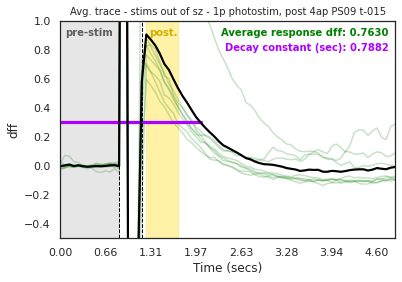

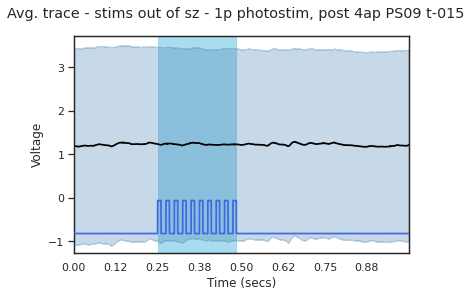

In [47]:
title = 'Avg. trace - stims out of sz -'

flu_list, mean_response, decay_constant = aoplot.plot_flu_1pstim_avg_trace(expobj, x_axis='time', individual_traces=True, stim_span_color=None, y_axis='dff', quantify=True, stims_to_analyze = expobj.stims_out_sz,
                                                          title = title, ylims=[-0.5, 1.0])

# stims_out_sz_timings = [(expobj.frame_clock_actual[stim] - expobj.frame_start_time_actual) for stim in expobj.stims_out_sz]
# print(stims_out_sz_timings)
aoplot.plot_lfp_1pstim_avg_trace(expobj, x_axis='time', individual_traces=False, pre_stim=0.25, post_stim=0.75, optoloopback=True, stims_to_analyze = expobj.stims_out_sz, title = title)


In [48]:
print(expobj.pkl_path, '\nmean response to save: ', mean_response)
onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == expobj.pkl_path, 'post-4ap response (outside sz)'] = mean_response
onePresults.save()

/home/pshah/mnt/qnap/Analysis/2021-01-24/PS09//2021-01-24_t-015/2021-01-24_t-015.pkl 
mean response to save:  0.763


pkl saved to /home/pshah/mnt/qnap/Analysis/onePstim_results_superobject.pkl



In [49]:
onePresults.mean_stim_responses

,pkl_list,pre-4ap response,post-4ap response (outside sz),post-4ap response (during sz),Prep,Trial,Decay constant pre-4ap (secs.),Decay constant post-4ap outside sz (secs.),Decay constant post-4ap during sz (secs.)
0,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS17/...,0.1686,-,-,PS17,t-008,0.328371,NaN,NaN
1,/home/pshah/mnt/qnap/Analysis/2021-01-19/2021-...,0.3574,-,-,PS07,t-003,0.459718,NaN,NaN
2,/home/pshah/mnt/qnap/Analysis/2021-01-19//2021...,0.3032,-,-,PS07,t-010,0.465946,NaN,NaN
4,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.418,-,-,PS11,t-004,0.459799,NaN,NaN
5,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.3856,-,-,PS11,t-009,0.525532,NaN,NaN
6,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS18/...,0.3594,-,-,PS18,t-007,0.459749,NaN,NaN
7,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS09/...,0.2662,-,-,PS09,t-008,0.525459,NaN,NaN
8,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.1217,-,-,PS16,t-005,0.459640,NaN,NaN
9,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.093,-,-,PS16,t-006,0.393989,NaN,NaN
10,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.087,-,-,PS16,t-008,0.465946,NaN,NaN


## POST 4ap TRIALS - stims in seizures

In [50]:
onePresults.mean_stim_responses

,pkl_list,pre-4ap response,post-4ap response (outside sz),post-4ap response (during sz),Prep,Trial,Decay constant pre-4ap (secs.),Decay constant post-4ap outside sz (secs.),Decay constant post-4ap during sz (secs.)
0,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS17/...,0.1686,-,-,PS17,t-008,0.328371,NaN,NaN
1,/home/pshah/mnt/qnap/Analysis/2021-01-19/2021-...,0.3574,-,-,PS07,t-003,0.459718,NaN,NaN
2,/home/pshah/mnt/qnap/Analysis/2021-01-19//2021...,0.3032,-,-,PS07,t-010,0.465946,NaN,NaN
4,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.418,-,-,PS11,t-004,0.459799,NaN,NaN
5,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.3856,-,-,PS11,t-009,0.525532,NaN,NaN
6,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS18/...,0.3594,-,-,PS18,t-007,0.459749,NaN,NaN
7,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS09/...,0.2662,-,-,PS09,t-008,0.525459,NaN,NaN
8,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.1217,-,-,PS16,t-005,0.459640,NaN,NaN
9,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.093,-,-,PS16,t-006,0.393989,NaN,NaN
10,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.087,-,-,PS16,t-008,0.465946,NaN,NaN


In [51]:
expobj.stims_in_sz

[574, 724, 875, 1025, 1175, 1325, 1476, 1626, 1776, 1926, 2077, 2227]

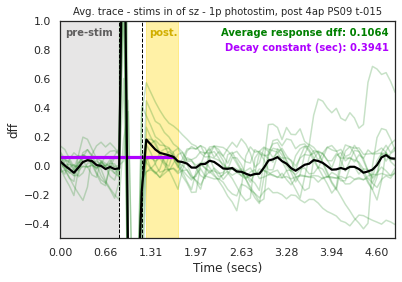

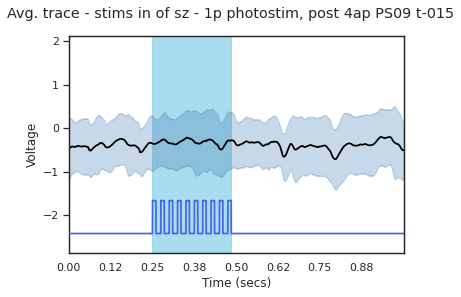

In [52]:
title = 'Avg. trace - stims in of sz -'

flu_list, mean_response, decay_constant = aoplot.plot_flu_1pstim_avg_trace(expobj, x_axis='time', individual_traces=True, stim_span_color=None, y_axis='dff', quantify=True, stims_to_analyze = expobj.stims_in_sz,
                                                          title=title)

# stims_in_sz_timings = [(expobj.frame_clock_actual[stim] - expobj.frame_start_time_actual) for stim in expobj.stims_in_sz]
aoplot.plot_lfp_1pstim_avg_trace(expobj, x_axis='time', individual_traces=False, pre_stim=0.25, post_stim=0.75, optoloopback=True, stims_to_analyze = expobj.stims_in_sz, title=title)


In [53]:
print(expobj.pkl_path, '\nmean response to save: ', mean_response)
onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == expobj.pkl_path, 'post-4ap response (during sz)'] = mean_response
onePresults.save()

/home/pshah/mnt/qnap/Analysis/2021-01-24/PS09//2021-01-24_t-015/2021-01-24_t-015.pkl 
mean response to save:  0.1064


pkl saved to /home/pshah/mnt/qnap/Analysis/onePstim_results_superobject.pkl



In [54]:
onePresults.mean_stim_responses

,pkl_list,pre-4ap response,post-4ap response (outside sz),post-4ap response (during sz),Prep,Trial,Decay constant pre-4ap (secs.),Decay constant post-4ap outside sz (secs.),Decay constant post-4ap during sz (secs.)
0,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS17/...,0.1686,-,-,PS17,t-008,0.328371,NaN,NaN
1,/home/pshah/mnt/qnap/Analysis/2021-01-19/2021-...,0.3574,-,-,PS07,t-003,0.459718,NaN,NaN
2,/home/pshah/mnt/qnap/Analysis/2021-01-19//2021...,0.3032,-,-,PS07,t-010,0.465946,NaN,NaN
4,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.418,-,-,PS11,t-004,0.459799,NaN,NaN
5,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.3856,-,-,PS11,t-009,0.525532,NaN,NaN
6,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS18/...,0.3594,-,-,PS18,t-007,0.459749,NaN,NaN
7,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS09/...,0.2662,-,-,PS09,t-008,0.525459,NaN,NaN
8,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.1217,-,-,PS16,t-005,0.459640,NaN,NaN
9,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.093,-,-,PS16,t-006,0.393989,NaN,NaN
10,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.087,-,-,PS16,t-008,0.465946,NaN,NaN


## Decay constants quantification (FOR ALL TRIALS)

In [ ]:
# %% ADD DECAY CONSTANTS TO THE mean_stim_responses dataframe

# pre-4ap trials
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    if list(onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == pkl_path, 'pre-4ap response'])[0] != '-':

        expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path)

        flu_list, mean_response, decay_constant = aoplot.plot_flu_1pstim_avg_trace(expobj, x_axis='time', y_axis='dff', show=False, quantify=True)
        onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses[
                                                'pkl_list'] == expobj.pkl_path, 'Decay constant (secs.)'] = decay_constant
onePresults.save()




# post-4ap stims out of sz trials
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    if list(onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == pkl_path, 'post-4ap response (outside sz)'])[0] != '-':

        expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path)

        flu_list, mean_response, decay_constant = aoplot.plot_flu_1pstim_avg_trace(expobj, x_axis='time', y_axis='dff', stims_to_analyze=expobj.stims_out_sz, show=False, quantify=True)
        onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses[
                                                'pkl_list'] == expobj.pkl_path, 'Decay constant (secs.)'] = decay_constant
onePresults.save()



# post-4ap stims during sz trials
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    if list(onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == pkl_path, 'post-4ap response (during sz)'])[0] != '-':

        expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path)

        flu_list, mean_response, decay_constant = aoplot.plot_flu_1pstim_avg_trace(expobj, x_axis='time', y_axis='dff', stims_to_analyze=expobj.stims_in_sz, show=False, quantify=True)
        onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses[
                                                'pkl_list'] == expobj.pkl_path, 'Decay constant (secs.)'] = decay_constant
onePresults.save()



In [6]:
onePresults.mean_stim_responses

,pkl_list,pre-4ap response,post-4ap response (outside sz),post-4ap response (during sz),Prep,Trial,Decay constant (secs.)
0,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS17/...,0.1686,-,-,PS17,t-008,0.328371
1,/home/pshah/mnt/qnap/Analysis/2021-01-19/2021-...,0.3574,-,-,PS07,t-003,0.459718
2,/home/pshah/mnt/qnap/Analysis/2021-01-19//2021...,0.3032,-,-,PS07,t-010,0.465946
4,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.418,-,-,PS11,t-004,0.459799
5,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.3856,-,-,PS11,t-009,0.525532
6,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS18/...,0.3594,-,-,PS18,t-007,0.459749
7,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS09/...,0.2662,-,-,PS09,t-008,0.525459
8,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.1217,-,-,PS16,t-005,0.459640
9,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.093,-,-,PS16,t-006,0.393989
10,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.087,-,-,PS16,t-008,0.465946


## PLOTS FOR ALL TRIALS

In [4]:
# import onePstim superobject that will collect analyses from various individual experiments
results_object_path = '/home/pshah/mnt/qnap/Analysis/onePstim_results_superobject.pkl'
onePresults = aoutils.import_resultsobj(pkl_path=results_object_path)



importing resultsobj from: /home/pshah/mnt/qnap/Analysis/onePstim_results_superobject.pkl


DONE IMPORT of <class 'alloptical_utils_pj.OnePhotonResults'> resultsobj




DONE IMPORT of PS17: t-008, 1p photostim, pre 4ap, 2x 20x 1p stim
Average response dff: 0.1686


DONE IMPORT of PS07: t-003, 1p photostim, pre 4ap, 20x trials of 1p stim
Average response dff: 0.3574


DONE IMPORT of PS07: t-010, 1p photostim, pre 4ap, 20x 1p stims
Average response dff: 0.3032


DONE IMPORT of PS11: t-004, 1p photostim, pre 4ap, 20x trials of 1p stim
Average response dff: 0.4180


DONE IMPORT of PS11: t-009, 1p photostim, pre 4ap, 20x trials of 1p stim
Average response dff: 0.3856


DONE IMPORT of PS18: t-007, 1p photostim, pre 4ap, 3x 20x 1p stims
Average response dff: 0.3594


DONE IMPORT of PS09: t-008, 1p photostim, pre 4ap, 20x trials of 1p stim
Average response dff: 0.2662


DONE IMPORT of PS16: t-005, 1p photostim, pre 4ap, 20x 1p stims
Average response dff: 0.1217


DONE IMPORT of PS16: t-006, 1p photostim, pre 4ap, 20x 1p stims
Average response dff: 0.0930


DONE IMPORT of PS16: t-008, 1p photostim, pre 4ap, 20x 1p stims
Average response dff: 0.0870


DONE IM

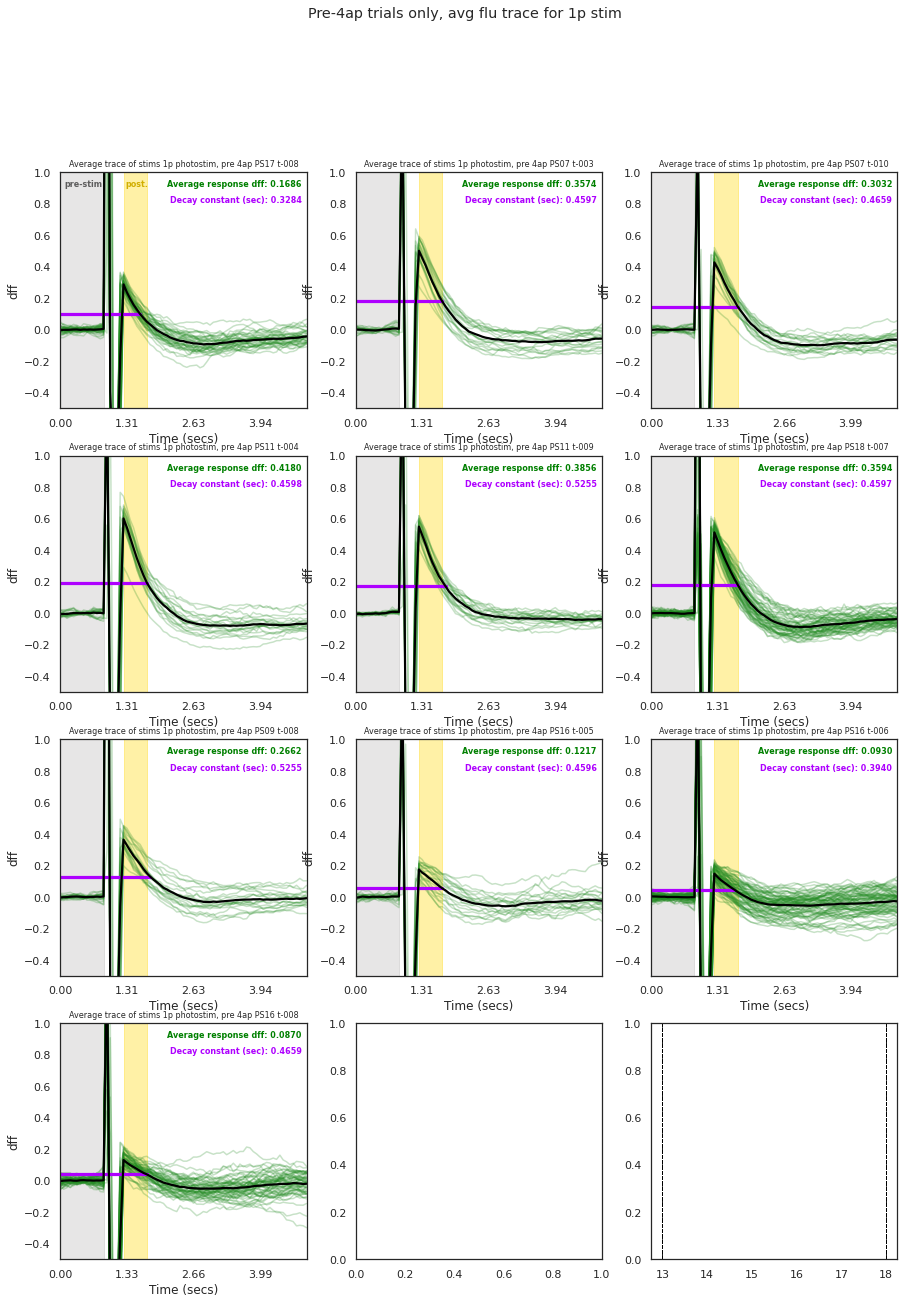

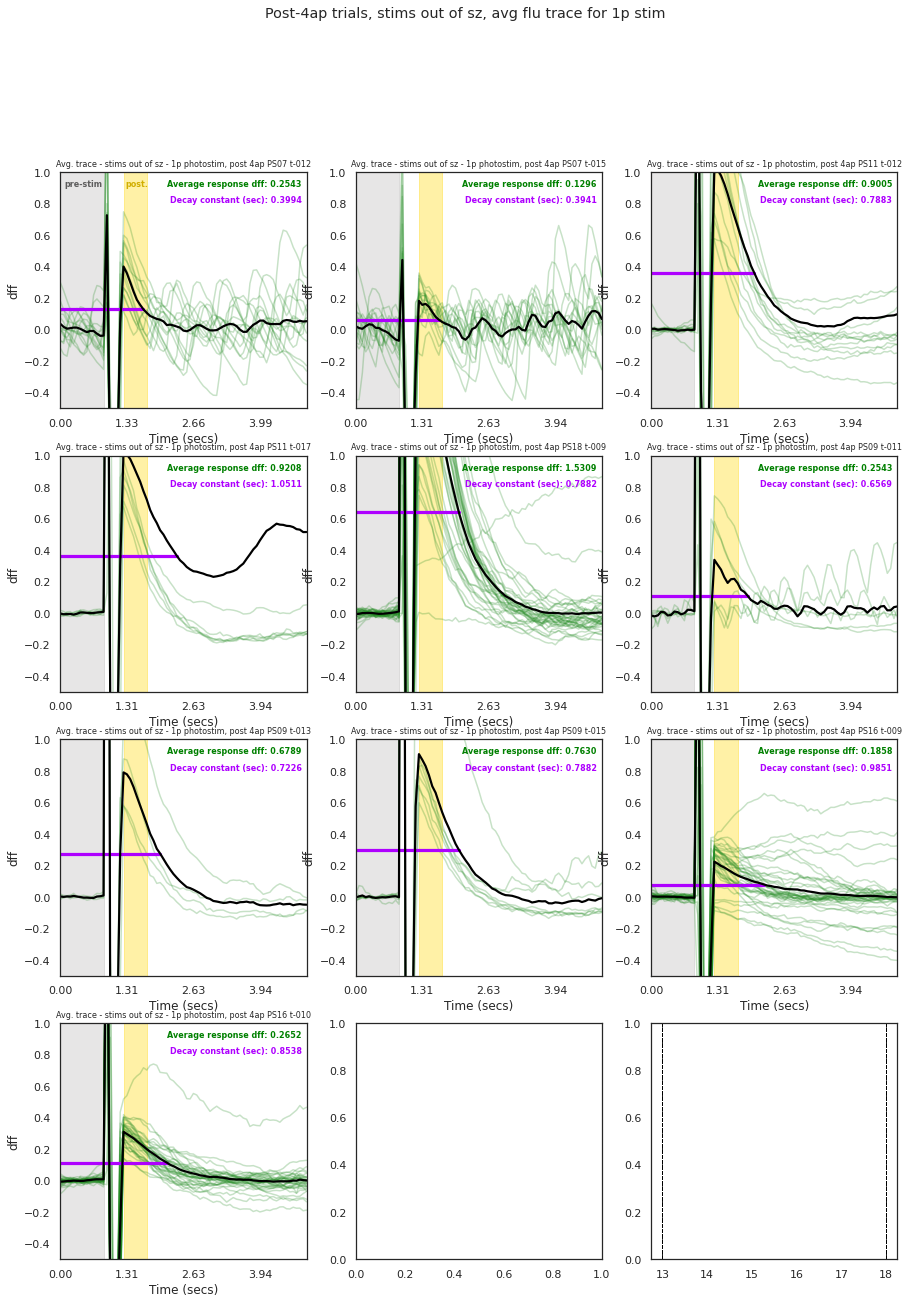

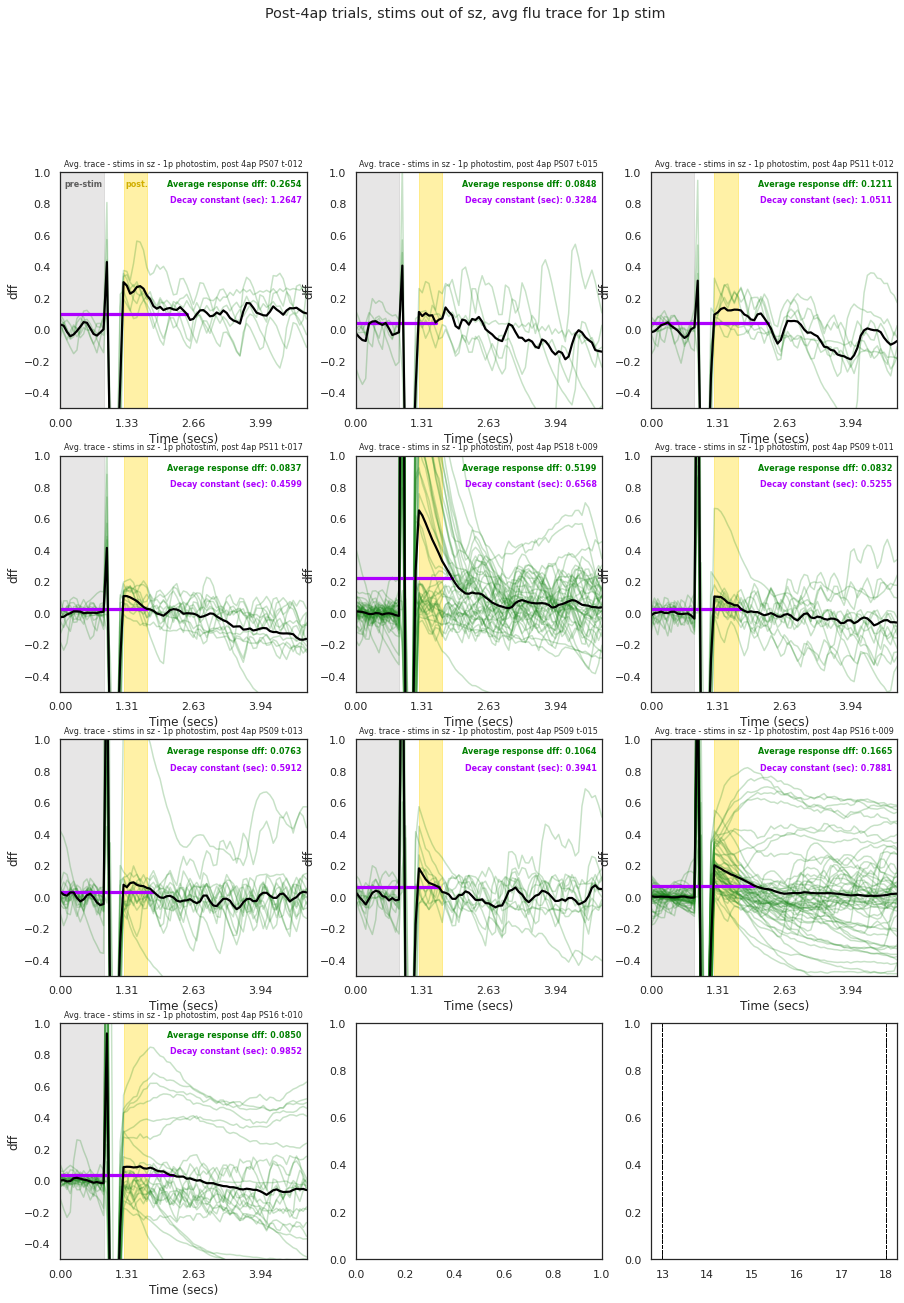

In [5]:
# pre-4ap trials plot
nrows = 4
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
counter = 0; write_full_text=True
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    if list(onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == pkl_path, 'pre-4ap response'])[0] != '-':

        expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path, verbose=False)
        ax = axs[counter//ncols, counter % ncols]

        fig, ax, flu_list, mean_response, decay_constant = aoplot.plot_flu_1pstim_avg_trace(expobj, x_axis='time', individual_traces=True, stim_span_color=None, y_axis='dff', quantify=True,
                                                                                            show=False, fig=fig, ax=ax, write_full_text=write_full_text, shrink_text=1.25)
        # fig, ax = aoplot.plot_lfp_1pstim_avg_trace(expobj, x_axis='time', individual_traces=False, pre_stim=0.25, post_stim=0.75, optoloopback=True, show=False)

        axs[counter // ncols, counter % ncols] = ax

        counter += 1
        write_full_text = False  # switch off write full text option after the first plot

fig.suptitle('Pre-4ap trials only, avg flu trace for 1p stim', y=0.995)
fig.show()


# post-4ap stims out of sz trials plot
nrows = 4
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
counter = 0; write_full_text=True
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    if list(onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == pkl_path, 'post-4ap response (outside sz)'])[0] != '-':
        expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path, verbose=False)
        ax = axs[counter//ncols, counter % ncols]

        title = 'Avg. trace - stims out of sz -'

        fig, ax, flu_list, mean_response, decay_constant = aoplot.plot_flu_1pstim_avg_trace(expobj, x_axis='time', individual_traces=True, stim_span_color=None, y_axis='dff', quantify=True,
                                                                                            show=False, fig=fig, ax=ax, write_full_text=write_full_text, shrink_text=1.25, stims_to_analyze=expobj.stims_out_sz,
                                                                                            title=title)
        # fig, ax = aoplot.plot_lfp_1pstim_avg_trace(expobj, x_axis='time', individual_traces=False, pre_stim=0.25, post_stim=0.75, optoloopback=True, show=False)

        axs[counter // ncols, counter % ncols] = ax

        counter += 1
        write_full_text = False  # switch off write full text option after the first plot

fig.suptitle('Post-4ap trials, stims out of sz, avg flu trace for 1p stim', y=0.995)
fig.show()



# post-4ap stims during sz trials plot
nrows = 4
ncols = 3
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 5, nrows * 5))
counter = 0; write_full_text = True
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    if list(onePresults.mean_stim_responses.loc[onePresults.mean_stim_responses['pkl_list'] == pkl_path, 'post-4ap response (during sz)'])[0] != '-':
        expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path, verbose=False)
        ax = axs[counter//ncols, counter % ncols]

        title = 'Avg. trace - stims in sz -'

        fig, ax, flu_list, mean_response, decay_constant = aoplot.plot_flu_1pstim_avg_trace(expobj, x_axis='time', individual_traces=True, stim_span_color=None, y_axis='dff', quantify=True,
                                                                                            show=False, fig=fig, ax=ax, write_full_text=write_full_text, shrink_text=1.25, stims_to_analyze=expobj.stims_in_sz,
                                                                                            title=title)
        # fig, ax = aoplot.plot_lfp_1pstim_avg_trace(expobj, x_axis='time', individual_traces=False, pre_stim=0.25, post_stim=0.75, optoloopback=True, show=False)

        axs[counter // ncols, counter % ncols] = ax

        counter += 1
        write_full_text = False  # switch off write full text option after the first plot

fig.suptitle('Post-4ap trials, stims out of sz, avg flu trace for 1p stim', y=0.995)
fig.show()


In [1]:
#%% DATA ANALYSIS FOR ONE-P PHOTOSTIM EXPERIMENTS
import sys
sys.path.append('/home/pshah/Documents/code/PackerLab_pycharm/')

import utils.funcs_pj as pjf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import alloptical_utils_pj as aoutils
import alloptical_plotting as aoplot


In [2]:
# create onePstim superobject that will collect analyses from various individual experiments

results_object_path = '/home/pshah/mnt/qnap/Analysis/onePstim_results_superobject.pkl'
if os.path.exists(results_object_path):
    onePresults = aoutils.import_resultsobj(pkl_path=results_object_path)
else:
    aoutils.OnePhotonResults(save_path=results_object_path)



importing resultsobj from: /home/pshah/mnt/qnap/Analysis/onePstim_results_superobject.pkl


DONE IMPORT of <class 'alloptical_utils_pj.OnePhotonResults'> resultsobj


In [3]:
onePresults.mean_stim_responses

,pkl_list,pre-4ap response,post-4ap response (outside sz),post-4ap response (during sz),Prep,Trial,Decay constant (secs.)
0,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS17/...,0.1686,-,-,PS17,t-008,0.328371
1,/home/pshah/mnt/qnap/Analysis/2021-01-19/2021-...,0.3574,-,-,PS07,t-003,0.459718
2,/home/pshah/mnt/qnap/Analysis/2021-01-19//2021...,0.3032,-,-,PS07,t-010,0.465946
4,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.418,-,-,PS11,t-004,0.459799
5,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS11/...,0.3856,-,-,PS11,t-009,0.525532
6,/home/pshah/mnt/qnap/Analysis/2021-02-02/PS18/...,0.3594,-,-,PS18,t-007,0.459749
7,/home/pshah/mnt/qnap/Analysis/2021-01-24/PS09/...,0.2662,-,-,PS09,t-008,0.525459
8,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.1217,-,-,PS16,t-005,0.459640
9,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.093,-,-,PS16,t-006,0.393989
10,/home/pshah/mnt/qnap/Analysis/2021-02-01//2021...,0.087,-,-,PS16,t-008,0.465946


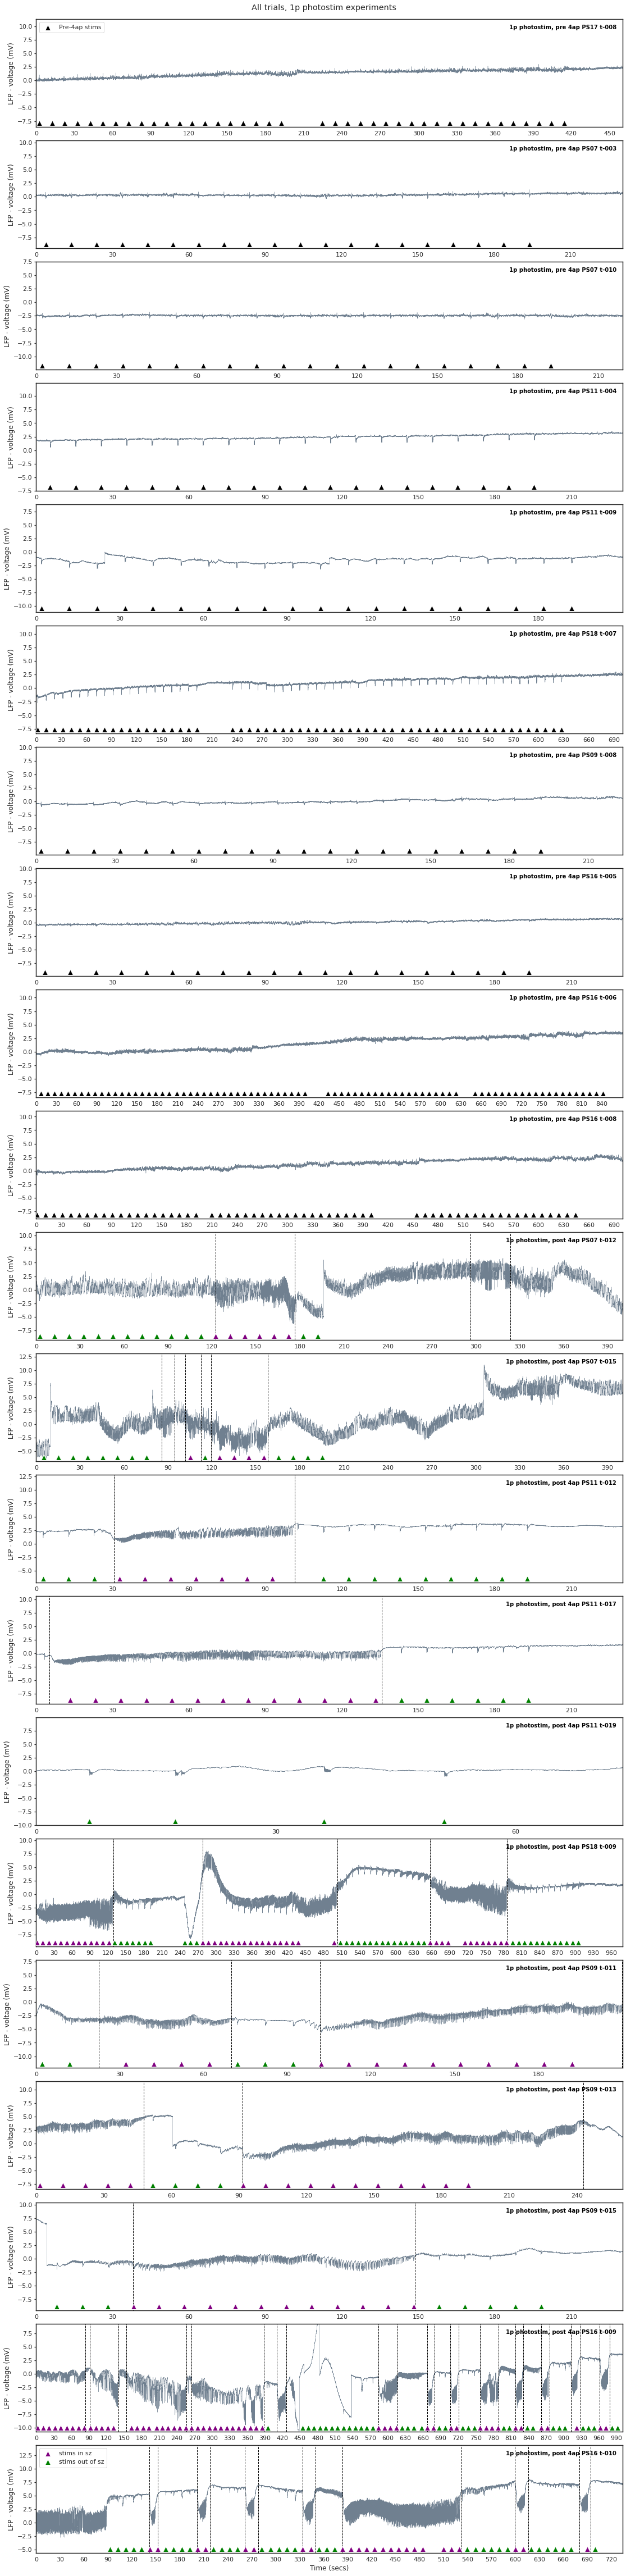

In [5]:
# LFP + stims plots


nrows = 21
ncols = 1
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols * 15, nrows * 3))
fig.tight_layout(pad=0)
counter = 0; show_legend = True
for pkl_path in onePresults.mean_stim_responses['pkl_list']:
    expobj, experiment = aoutils.import_expobj(pkl_path=pkl_path, verbose=False)
    ax = axs[counter]
    ax2 = ax.twinx()
    fig, ax, ax2 = aoplot.plot_lfp_stims(expobj, x_axis='time', sz_markings=True,
                                         show=False, fig=fig, ax=ax, ax2=ax2)
    if show_legend:
        ax2.legend(loc='upper left')
        show_legend = False
    counter += 1
ax2.legend()
ax.set_xlabel('Time (secs)')
fig.suptitle('All trials, 1p photostim experiments', y=1.005)
fig.show()
